# Algoritmos de clasificacion lineal

In [2]:
# Dataset
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0,
                           n_repeated=0, n_classes=2, n_clusters_per_class=1,
                           random_state=0)

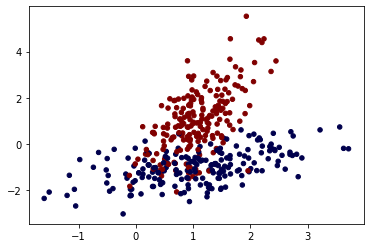

In [3]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap('seismic')
plt.scatter(X[:,0], X[:,1], 20.0, Y, cmap = cmap)
plt.show()

In [21]:
import numpy as np
def plot_class(model, X, Y,n):
  xmin, xmax = np.amin(X[:,0]), np.amax(X[:,0])
  ymin, ymax = np.amin(X[:,1]), np.amax(X[:,1])
  xx, yy = np.meshgrid(np.linspace(xmin,xmax,n),np.linspace(ymin,ymax,n))
  z = np.c_[xx.ravel(), yy.ravel()]
  Y_predict = model.predict(z)
  Y_predict = Y_predict.reshape(xx.shape)
  cmap = plt.get_cmap('coolwarm')
  plt.contourf(xx,yy,Y_predict, cmap=cmap)
  cmap = plt.get_cmap('seismic')
  plt.scatter(X[:,0], X[:,1], 20.0, Y, cmap=cmap)
  plt.show()

In [27]:
def plot_proba(model, X, Y,n):
  xmin, xmax = np.amin(X[:,0]), np.amax(X[:,0])
  ymin, ymax = np.amin(X[:,1]), np.amax(X[:,1])
  xx, yy = np.meshgrid(np.linspace(xmin,xmax,n),np.linspace(ymin,ymax,n))
  z = np.c_[xx.ravel(), yy.ravel()]
  Y_predict = model.predict_proba(z)[:,1]
  Y_predict = Y_predict.reshape(xx.shape)
  cmap = plt.get_cmap('coolwarm')
  plt.contourf(xx,yy,Y_predict, cmap=cmap)
  cmap = plt.get_cmap('seismic')
  plt.scatter(X[:,0], X[:,1], 20.0, Y, cmap=cmap)
  plt.show()

## 1. Regresion logistica

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [14]:
lr.fit(X,Y)

LogisticRegression()

In [17]:
lr.score(X,Y)

0.87

In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y, lr.predict(X)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       197
           1       0.90      0.84      0.87       203

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



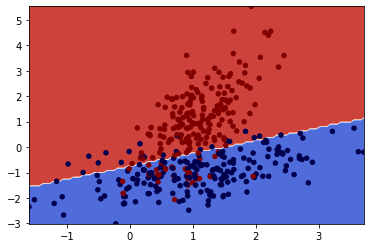

In [22]:
plot_class(lr, X, Y,100)

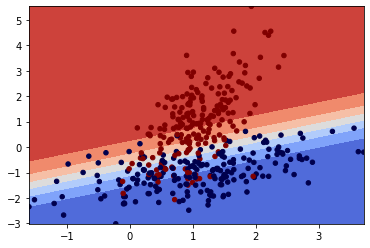

In [28]:
plot_proba(lr, X, Y,100)

## 2. Clasificador SGD

In [30]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [33]:
sgd.fit(X,Y)

SGDClassifier()

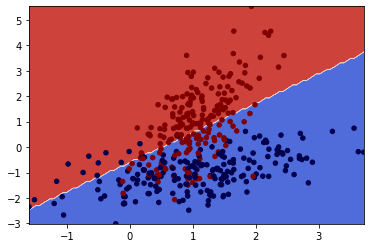

In [34]:
plot_class(sgd, X, Y,100)

In [36]:
print(classification_report(Y, sgd.predict(X)))

              precision    recall  f1-score   support

           0       0.71      0.93      0.80       197
           1       0.90      0.63      0.74       203

    accuracy                           0.78       400
   macro avg       0.80      0.78      0.77       400
weighted avg       0.81      0.78      0.77       400



## 3. Algoritmos pasivos agresivos

In [37]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()

In [38]:
pac.fit(X,Y)

PassiveAggressiveClassifier()

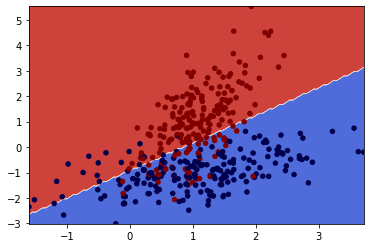

In [39]:
plot_class(pac,X,Y,100)

In [40]:
print(classification_report(Y,pac.predict(X)))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       197
           1       0.89      0.75      0.82       203

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



# Metricas de clasificacion

## 1. Matriz de confusion

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,lr.predict(X),normalize='true')

In [45]:
import seaborn as sns
import pandas as pd

df_cm = pd.DataFrame(cm, index=["P "+str(i) for i in range(2)],
                     columns = ["T "+str(i) for i in range(2)])

In [46]:
df_cm

,T 0,T 1
P 0,0.898477,0.101523
P 1,0.157635,0.842365


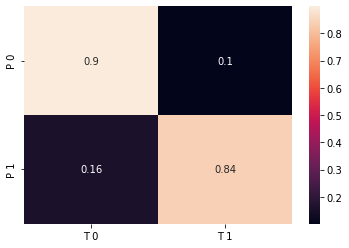

In [47]:
sns.heatmap(df_cm, annot=True)

## 2. Curva de aprendizaje

In [51]:
X, Y = make_classification(n_samples=4000, n_features=2, n_informative=2, n_redundant=0,
                           n_repeated=0, n_classes=2, n_clusters_per_class=1,
                           random_state=0)

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,Y)

LogisticRegression()

In [54]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 20)
ts, train_score, test_score = learning_curve(lr, X, Y, cv=10, random_state=0, train_sizes=train_sizes)

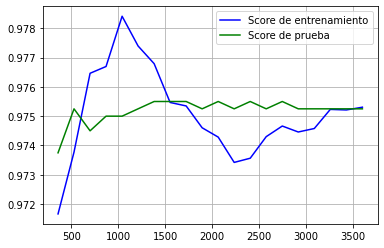

In [56]:
plt.grid('on')
plt.plot(ts, train_score.mean(axis=1), 'b')
plt.plot(ts, test_score.mean(axis=1), 'g')
plt.legend(['Score de entrenamiento','Score de prueba'])
plt.show()

## 3. Curva ROC

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, th = roc_curve(Y, lr.decision_function(X))

In [59]:
from sklearn.metrics import auc
print(auc(fpr,tpr))

0.9893256832855205


In [60]:
auc_value = auc(fpr,tpr)

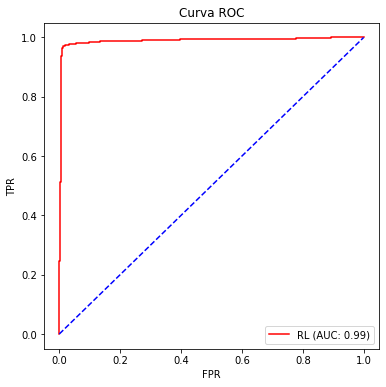

In [66]:
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr, color='r', label='RL (AUC: %.2f)' % auc_value)
plt.plot([0,1],[0,1],'b--')
plt.title('Curva ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()